In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,log_loss,cohen_kappa_score,RocCurveDisplay
warnings.filterwarnings('ignore')

In [2]:
# DATA PREPROCESSING
data=pd.read_csv("parkinsons.csv")
data.drop(['name'],axis=1)
x=data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
y=data['status']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.10,random_state=1)
ss=MaxAbsScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
model=HistGradientBoostingClassifier()
model.fit(X_train,Y_train)
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [3]:
print("accuracy score on training phase : ",accuracy_score(Y_pred_train,Y_train))
print("accuracy score on testing phase : ",accuracy_score(Y_pred_test,Y_test))

accuracy score on training phase :  1.0
accuracy score on testing phase :  1.0


In [4]:
print("precision score on training phase : ",precision_score(Y_pred_train,Y_train))
print("precision score on testing phase : ",precision_score(Y_pred_test,Y_test))

precision score on training phase :  1.0
precision score on testing phase :  1.0


In [5]:
print("f1 score on training phase : ",f1_score(Y_pred_train,Y_train))
print("f1 score on testing phase : ",f1_score(Y_pred_test,Y_test))

f1 score on training phase :  1.0
f1 score on testing phase :  1.0


In [6]:
print("recall score on training phase : ",recall_score(Y_pred_train,Y_train))
print("recall score on testing phase : ",recall_score(Y_pred_test,Y_test))

recall score on training phase :  1.0
recall score on testing phase :  1.0


In [7]:
print("ROC-AUC score on training phase : ",roc_auc_score(Y_train,Y_pred_train))
print("ROC-AUC score on testing phase : ",roc_auc_score(Y_test,Y_pred_test))

ROC-AUC score on training phase :  1.0
ROC-AUC score on testing phase :  1.0


In [8]:
print("cohen-kappa score on training phase : ",cohen_kappa_score(Y_pred_train,Y_train))
print("cohen-kappa score on testing phase : ",cohen_kappa_score(Y_pred_test,Y_test))

cohen-kappa score on training phase :  1.0
cohen-kappa score on testing phase :  1.0


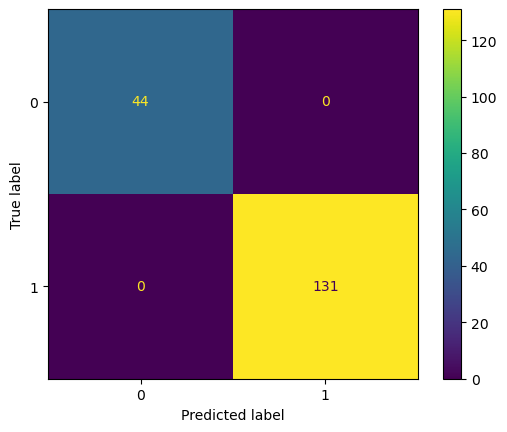

In [9]:
# TRAINING PHASE CONFUSION MATRIX
ConfusionMatrixDisplay.from_predictions(Y_train,Y_pred_train)

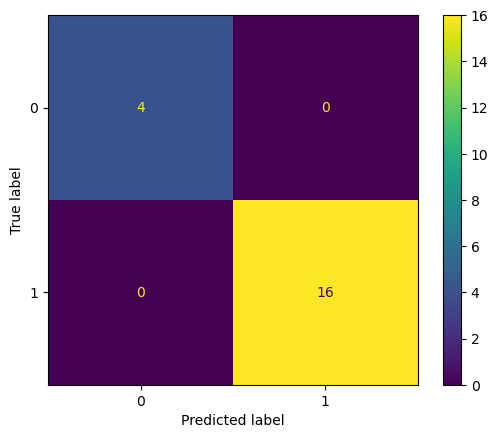

In [10]:
# TESTING PHASE CONFUSION MATRIX
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_test)

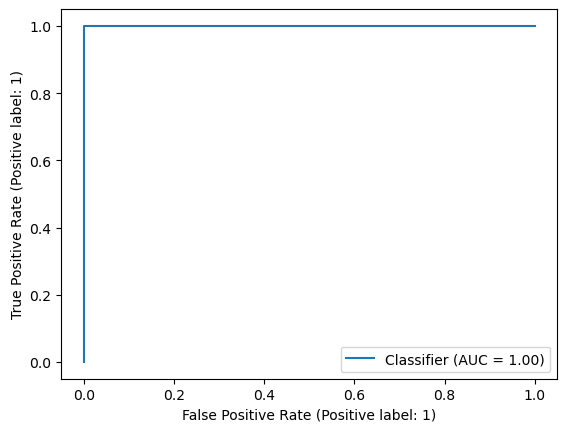

In [11]:
Y_pred_roc_train = model.decision_function(X_train)
RocCurveDisplay.from_predictions(Y_train,Y_pred_roc_train)

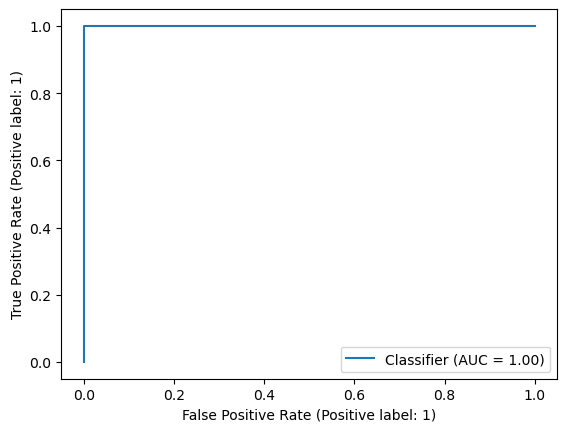

In [12]:
Y_pred_roc_test = model.decision_function(X_test)
RocCurveDisplay.from_predictions(Y_test,Y_pred_roc_test)